In [63]:
import pandas as pd
df = pd.read_csv('CLEAN.csv')


In [64]:
#stanford dataset
accepted = df[df['Acceptances'].str.contains('AUSTIN')]
accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
accepted['Decision'] = 1



rejected = df[df['Rejections'].str.contains('AUSTIN')]
rejected.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
rejected['Decision'] = 0



print(accepted.shape)
print(rejected.shape)



dataset = pd.concat([accepted, rejected])
dataset.drop(columns=['Note'], inplace=True)
dataset

(74, 12)
(94, 12)


C:\Users\shrey\AppData\Local\Temp\ipykernel_19640\2587953819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_19640\2587953819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted['Decision'] = 1
C:\Users\shrey\AppData\Local\Temp\ipykernel_19640\2587953819.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
3,M,WHITE,IN,Low,-1,URM,CS,1580,5.5,1.5,1
7,F,BLACK,TX,Middle,PUBLIC,URM,ENG,1520,3.0,2.5,1
14,M,WHITE,TX,Low,-1,NONE,LAW,1560,6.5,3.5,1
60,F,WHITE,TX,Low,PUBLIC,URM,CS,1420,5.5,4.5,1
83,M,ASIAN,CA,High,PUBLIC,NONE,CS,1440,7.5,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...
1421,M,WHITE,TX,High,PRIVATE,NONE,CS,1490,3.5,7.2,0
1426,F,WHITE,USA,Low,PUBLIC,LEGACY,MEDIA STUDIES,1410,5.0,6.2,0
1434,F,ASIAN,TX,High,LARGE,NONE,ENG,1540,6.5,4.2,0
1464,M,WHITE,GA,Low,PUBLIC,NONE,ENG,1470,3.5,6.5,0


In [65]:
def bucketize(df, column, num_buckets):
    df[column] = pd.qcut(df[column], num_buckets, labels=False)
    return df

#dataset = bucketize(dataset, 'SAT', 4)
#dataset = bucketize(dataset, 'EC-AWARDS', 4)
#dataset = bucketize(dataset, 'ESSAY-LOR-INTERVIEW', 4)

dataset

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
3,M,WHITE,IN,Low,-1,URM,CS,1580,5.5,1.5,1
7,F,BLACK,TX,Middle,PUBLIC,URM,ENG,1520,3.0,2.5,1
14,M,WHITE,TX,Low,-1,NONE,LAW,1560,6.5,3.5,1
60,F,WHITE,TX,Low,PUBLIC,URM,CS,1420,5.5,4.5,1
83,M,ASIAN,CA,High,PUBLIC,NONE,CS,1440,7.5,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...
1421,M,WHITE,TX,High,PRIVATE,NONE,CS,1490,3.5,7.2,0
1426,F,WHITE,USA,Low,PUBLIC,LEGACY,MEDIA STUDIES,1410,5.0,6.2,0
1434,F,ASIAN,TX,High,LARGE,NONE,ENG,1540,6.5,4.2,0
1464,M,WHITE,GA,Low,PUBLIC,NONE,ENG,1470,3.5,6.5,0


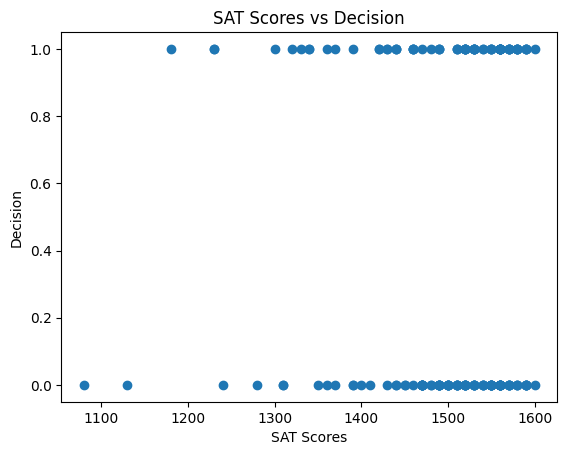

In [66]:
import matplotlib.pyplot as plt

# Extract SAT scores and Decision from the dataset
sat_scores = dataset['SAT']
decision = dataset['Decision']

# Create a scatter plot
plt.scatter(sat_scores, decision)

# Set labels and title
plt.xlabel('SAT Scores')
plt.ylabel('Decision')
plt.title('SAT Scores vs Decision')

# Show the plot
plt.show()

In [67]:
#tokensize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Race'] = le.fit_transform(dataset['Race'])
dataset['Residence'] = le.fit_transform(dataset['Residence'])
dataset['Income'] = le.fit_transform(dataset['Income'])
dataset['School Type'] = le.fit_transform(dataset['School Type'])
dataset['Hooks'] = le.fit_transform(dataset['Hooks'])
dataset['Major'] = le.fit_transform(dataset['Major'])
dataset['Decision'] = le.fit_transform(dataset['Decision'])


original_index = dataset.index
y = dataset['Decision']
X = dataset.drop('Decision', axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(data_scaled, columns=X.columns, index=original_index)
df_scaled['Decision'] = y

In [68]:
df_scaled

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
3,0.506559,1.903597,-0.552526,0.383203,-1.918310,1.216089,-0.259477,0.921324,-0.284445,-1.716139,1
7,-1.569097,0.014989,0.881055,1.846342,0.615307,1.216089,0.421651,0.273247,-1.569035,-1.267266,1
14,0.506559,1.903597,0.881055,0.383203,-1.918310,0.243218,1.443343,0.705299,0.229391,-0.818392,1
60,-1.569097,1.903597,0.881055,0.383203,0.615307,1.216089,-0.259477,-0.806882,-0.284445,-0.369519,1
83,0.506559,-0.614547,-1.269317,-1.079936,0.615307,0.243218,-0.259477,-0.590856,0.743227,-0.369519,1
...,...,...,...,...,...,...,...,...,...,...,...
1421,0.506559,1.903597,0.881055,-1.079936,0.108584,0.243218,-0.259477,-0.050792,-1.312117,0.842439,0
1426,-1.569097,1.903597,1.000520,0.383203,0.615307,-1.702525,2.124472,-0.914895,-0.541363,0.393566,0
1434,-1.569097,-0.614547,0.881055,-1.079936,-0.904863,0.243218,0.421651,0.489273,0.229391,-0.504181,0
1464,0.506559,1.903597,-0.910921,0.383203,0.615307,0.243218,0.421651,-0.266818,-1.312117,0.528228,0


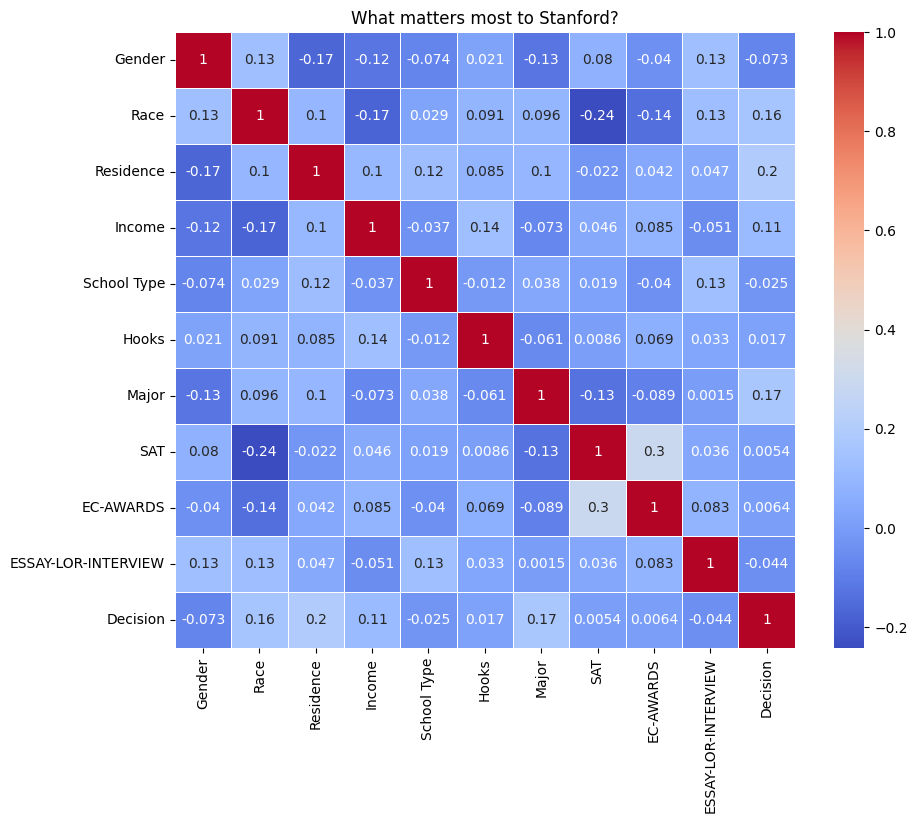

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_scaled.corr()


#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('What matters most to Stanford?')
plt.show()


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is called 'df'
# and the target column is 'final_label'

# Separate features (X) and target variable (y)
X = df_scaled.drop(columns=['Decision'], axis=1)
y = df_scaled['Decision']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier
# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")



Random Forest Accuracy: 0.5294117647058824


[0.15598681 0.13487024]


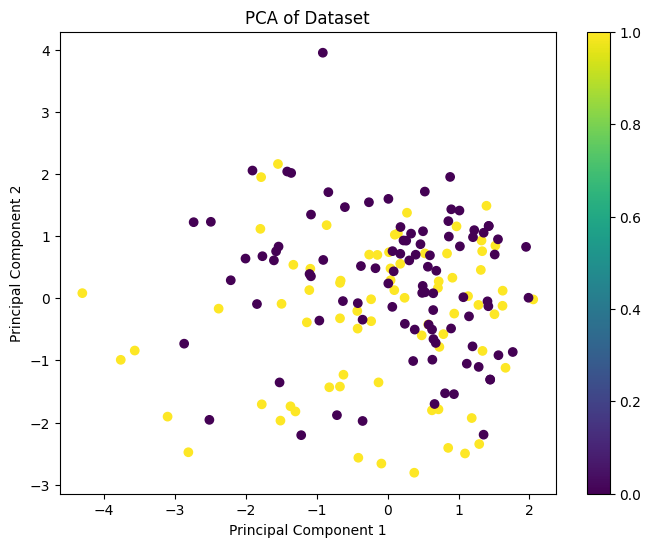

In [71]:
from sklearn.decomposition import PCA

# Initialize PCA, specifying the number of components
pca = PCA(n_components=2)  # You can start with 2 for visualization

# Fit and transform the data
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

target_variable = dataset['Decision']

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=target_variable, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

Accuracy: 0.3529

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.35      0.35        17
           1       0.35      0.35      0.35        17

    accuracy                           0.35        34
   macro avg       0.35      0.35      0.35        34
weighted avg       0.35      0.35      0.35        34



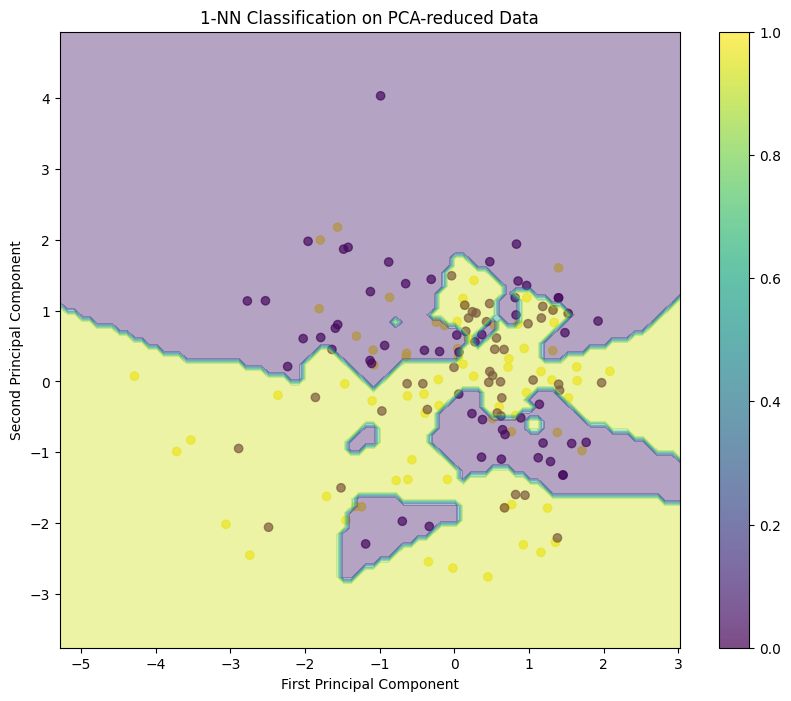

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have your original dataset in a variable called 'dataset'
# and your target variable is 'Decision'

# 1. Prepare the data
X = dataset.drop('Decision', axis=1)
y = dataset['Decision']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=3)  # You can adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Create and train the 1-NN model
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train, y_train)

# 6. Make predictions
y_pred = nn_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Visualize the results (for 2D PCA)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('1-NN Classification on PCA-reduced Data')
plt.colorbar(scatter)

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = nn_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.show()